In [1]:
strategy_name ='培宏量化1号'

In [2]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import rschLib
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import matplotlib.dates as mdates

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData

In [3]:
#参数：
startDate = 20180101

In [4]:
def dtes2Label(dtes):
    return np.array([datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in dtes])


In [5]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1

In [6]:
with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = rschLib.zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']

In [7]:
v = pd.DataFrame(vol_mtx)
q = np.array(v.rolling(5,axis=1).mean())
q = np.array(q)
lb = np.zeros(vol_mtx.shape)+1
lb[:,1:]=vol_mtx[:, 1:]/q[:,:-1]
lb[np.isfinite(lb)==False]=0

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [8]:
idxTiaoKongGaoKai = np.hstack((np.zeros((open_mtx.shape[0],1))==1,((open_mtx[:,1:] / high_mtx[:,:-1]) - 1 > 0.01)))

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [9]:
name = list(name)
tkrs = list(tkrs)

In [10]:
Ns = 10 # 取每天量比的前多少名
Wl = 500 # 当天收盘价格位于Wl日内的高低点相对位置
Ws = 20 #  当天收盘价格位于Ws日内的高低点相对位置
priceLocL = np.array(np.zeros(close_mtx.shape)) #较长时间内的价格位置
priceLocS = np.array(np.zeros(close_mtx.shape)) #较短时间内的价格位置
preHighL = np.array(np.zeros(close_mtx.shape))
preLowL = np.array(np.zeros(close_mtx.shape))
preHighS = np.array(np.zeros(close_mtx.shape))
preLowS = np.array(np.zeros(close_mtx.shape))
idxZhangtingAtClose = np.array(np.zeros(close_mtx.shape), dtype='bool') # 收盘没有涨停
idxZhangtingAtOpen = np.array(np.zeros(close_mtx.shape), dtype='bool') # 开盘没有涨停
idxZhangtingAtClose[:, 1:] = (close_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095
idxZhangtingAtOpen[:, 1:] = (open_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095

for k in range(1,close_mtx.shape[1]):    
    #长期价格位置
    q = np.max((0, k-Wl))
    preHighL[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowL[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocL[:, k] = (close_mtx[:,k-1]-preLowL[:,k])/(preHighL[:,k]-preLowL[:,k])
    #短期价格位置
    q = np.max((0, k-Ws))
    preHighS[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowS[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocS[:, k] = (close_mtx[:,k-1]-preLowS[:,k])/(preHighS[:,k]-preLowS[:,k])
    

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [11]:
q = list(db.tkrsInfo.find({},{
    'ticker':1,
    'circulateMarketValue20150101':1,
    'circulateMarketValue20160101':1,
    'circulateMarketValue20170101':1,
    'circulateMarketValue20180101':1,
    'circulateMarketValue20190101':1,
    'circulateMarketValue20200101':1,
    'circulateMarketValue':1
}))
cmv2016 = np.zeros(len(tkrs))
cmv2017 = np.zeros(len(tkrs))
cmv2018 = np.zeros(len(tkrs))
cmv2019 = np.zeros(len(tkrs))
cmv2020 = np.zeros(len(tkrs))
cmv = np.zeros(len(tkrs))
for x in q:
    if (x['ticker'] in list(tkrs))==False:
        continue
    if 'circulateMarketValue' in x:
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20160101' in x:
        cmv2016[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20160101']
    if 'circulateMarketValue20170101' in x:
        cmv2017[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20170101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20180101' in x:
        cmv2018[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20180101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20190101' in x:
        cmv2019[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20190101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20200101' in x:
        cmv2020[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20200101']


In [12]:
cmv_threshold = 100e4
wants = list(np.array(tkrs)[cmv2020>cmv_threshold])
off = 1
print('选股池大小：', len(wants))
q = [list(tkrs).index(x) for x in wants]
idxT = [x in q for x in range(len(tkrs))]

选股池大小： 775


In [13]:
idxNST = [('ST' in x)==False for x in name]

In [14]:
startDate = 20180101

In [15]:
tkrs.index('SH600420')
idxT[544]
print(priceLocL[544,-1],preLowL[544,-1], preHighL[544,-1],close_mtx[544,-1])

0.5676676756412299 7.987230769230769 11.85 10.24


In [16]:
priceLocThrsMin = 0.1 # 价格大于近期的priceLocthrsMin位置
priceLocThrsMax = 0.5 # 价格小于近期的priceLocthrsMax位置
lbMax = 30 # 量比允许最大值
db.strategyBackTestTrades.remove({'strategy_name':strategy_name})
k0  = np.nonzero(dtes>startDate)[0][1]
pnl1 = []
pnl2 = []
pnl3 = []
pnl4 = []
pnl5 = []
tradesCount = []
ll = list(tkrs)
nn = list(name)
dtesUsed = []
f = open("output.txt", "w")
sp = close_mtx.shape[1]-1
for k in range(k0, close_mtx.shape[1]):
    # 跳空高开， 价格位置
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]>0.1) & (priceLocL[:, k]<0.9)
    # 跳空高开
    idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.5) 
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.2)
    #选择高量比
    m = np.nonzero(idxQ==True)[0]
    lbm = lb[m,k]  
    lidx = m[np.argsort(lbm)[::-1]] #得到哪些股票在idxQ中存在且量比排名前十
    if (len(lidx)>10):
        lidx=lidx[:10]
    idxQ2 = np.zeros(idxQ.shape)==1
    idxQ2[lidx]=True
    
    t  = np.nonzero(idxQ2)[0]
    m = np.array(tkrs)[t]
    #qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1).limit(10))
    qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1))
    q = []
    qs = []
    for x in qt:
        if (x['sale1']==0):
            print('忽略涨停股：',x['StockName'],dtes[k], x['dateTime'])
            continue
        if (x['close']/x['sectional_open']-1 < 0):
            continue
        if (k<sp) & (idxZhangtingAtOpen[ll.index(x['ticker']), np.min((k+1, sp))]==True):
            print(x['ticker'], dtes[k],' 第二日开盘涨停不买')
            continue
        if x['ticker'] in qs:
            continue
        q.append(x)
        qs.append(x['ticker'])
    if (len(q)==0):
        continue
    mk = [x['ticker'] for x in q]
    q0 = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 34260000}, {'ticker':1, 'close':1, 'lb':1}))
    qc = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 53940000}, {'ticker':1, 'close':1, 'lb':1}))
    m0 = [x['ticker'] for x in q0]
    mc = [x['ticker'] for x in qc]
    index0 = [m0.index(x) for x in mk]
    indexc = [mc.index(x) for x in mk]
    close0930 = np.array([x['close'] for x in q0])[index0]
    close1500 = np.array([x['close'] for x in qc])[indexc]
    close0935  = np.array([x['close'] for x in q])
    sn = [x['ticker'] for x in q]
    idx = [ll.index(x['ticker']) for x in q]
    lbm = np.array([x['lb'] for x in q])
    pLocL = priceLocL[idx, k]
    pLocS = priceLocS[idx, k]
    close_today = close_mtx[idx, k]  # 今天收盘
    open_today = open_mtx[idx, k]    # 今天开盘
    close_tomorrow = close_mtx[idx, np.min((k+1,sp))] # 明天收盘
    if k+1<sp: # 明天开盘
        open_tomorrow = open_mtx[idx, k+1]
    else:
        open_tomorrow = close_mtx[idx, sp]
    if k+2<sp:
        open_p3 = open_mtx[idx, k+2]   # 后天开盘
    else:
        open_p3 = close_mtx[idx, sp]   # 后天开盘
    close_p3 = close_mtx[idx, np.min((k+2,sp))]  # 后天收盘
    close_yesterday = close_mtx[idx, k-1]
    close_yesterday2 = close_mtx[idx, k-2]
    isZhangTing = idxZhangtingAtClose[idx, k]
    
    # r1: 第一天入场到收盘
    # r2: 第一天收盘到第二天开盘
    # r3: 第二天开盘到第二天收盘
    # r4: 第二天收盘到第三天开盘
    # r5: 第三天开盘到第三天收盘
    r1 = np.mean(close1500/close0935 - 1)
    r2 = np.mean(open_tomorrow/close_today  - 1)
    r3 = np.mean(close_tomorrow/open_tomorrow - 1)
    r4 = np.mean(open_p3/close_tomorrow - 1)
    r5 = np.mean(close_p3/open_p3 - 1)
    pnl1.append(r1)
    pnl2.append(r2)
    pnl3.append(r3)
    pnl4.append(r4)
    pnl5.append(r5)
    tradesCount.append(len(close1500))
    dtesUsed.append(dtes[k])
    for (iq,t) in enumerate(sn):
        s = nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+\
        ',价格位置（长期),'+str(np.round(1e4*pLocL[iq])/1e2)+\
        ',价格位置（短期),'+str(np.round(1e4*pLocS[iq])/1e2)+\
        ',cmv2019,'+str(cmv2019[ll.index(t)])+\
        ',cmv2020,'+str(cmv2020[ll.index(t)])+\
        ',cmv2018,'+str(cmv2018[ll.index(t)])+\
        ',第一天涨幅,'+str(close_today[iq]/close_yesterday[iq]-1)+\
        ',开盘涨幅（9:30-9:35）,'+str(close0935[iq]/close0930[iq]-1)+\
        ',入场后到收盘,'+str(close_today[iq]/close0935[iq]-1)+\
        ',第二天开盘涨幅,'+str(open_tomorrow[iq]/close_today[iq]-1)+\
        ',第二天日内涨幅,'+str(close_tomorrow[iq]/open_tomorrow[iq]-1)+\
        ',第二天收盘至第三天开盘,'+str(open_p3[iq]/close_tomorrow[iq]-1)+\
        ',第三天开盘至收盘,'+str(close_p3[iq]/open_p3[iq]-1)+\
        ',昨日涨幅,'+str(close_yesterday[iq]/close_yesterday2[iq]-1)+\
        ',跳空高开幅度,'+str(open_today[iq]/close_yesterday[iq]-1)+\
        ',买入价,'+str(open_tomorrow[iq])+\
        ',卖出价,'+str(close_p3[iq])+\
        ',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1)+\
        ',是否涨停,'+str(isZhangTing[iq])
        f.write(s+'\n')
        print(nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+',进场价格:'+str(open_tomorrow[iq])+',出场价格:'+str(close_p3[iq])+',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1))
        db.strategyBackTestTrades.insert_one({'name':nn[ll.index(t)], 'dateIn':int(dtes[k]), 'strategy_name':strategy_name})
f.close()

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


忽略涨停股： 首创股份 20180103 2018-01-03 06:55:00
忽略涨停股： 金隅集团 20180103 2018-01-03 06:55:00
忽略涨停股： 重庆钢铁 20180103 2018-01-03 06:55:00
中远海控,20180103,量比,2.0,进场价格:6.99,出场价格:7.22,利润,0.03290414878397696
忽略涨停股： 重庆钢铁 20180104 2018-01-04 06:55:00
常熟银行,20180104,量比,7.0,进场价格:7.38841067229247,出场价格:7.258789432427689,利润,-0.01754385964912286
中国宝安,20180104,量比,3.0,进场价格:6.318245449725515,出场价格:6.210876572802074,利润,-0.016993464052287632
忽略涨停股： 重庆钢铁 20180105 2018-01-05 06:55:00
易见股份,20180105,量比,5.0,进场价格:11.046156716417908,出场价格:13.529850746268654,利润,0.22484689413823267
燕京啤酒,20180105,量比,3.0,进场价格:7.136563958708581,出场价格:7.106828275547295,利润,-0.004166666666666652
忽略涨停股： 重庆钢铁 20180108 2018-01-08 06:55:00
温氏股份,20180108,量比,4.0,进场价格:20.186762235363584,出场价格:20.04213611075125,利润,-0.007164404223227727
忽略涨停股： 易见股份 20180109 2018-01-09 06:55:00
忽略涨停股： 蓝光发展 20180109 2018-01-09 06:55:00
海油工程,20180110,量比,2.0,进场价格:6.537309147463024,出场价格:6.48881278880232,利润,-0.007418397626112627
广电运通,20180111,量比,5.0,进场价格:8.067596320064409,出场价格:7.3685305

忽略涨停股： 四维图新 20180327 2018-03-27 06:55:00
忽略涨停股： 恒生电子 20180327 2018-03-27 06:55:00
华兰生物,20180327,量比,3.0,进场价格:14.862208049841922,出场价格:14.697516019739576,利润,-0.011081262592343877
五矿稀土,20180327,量比,3.0,进场价格:11.363549160671463,出场价格:11.742334132693843,利润,0.033333333333333215
九阳股份,20180327,量比,2.0,进场价格:15.05778380054256,出场价格:15.783246944869523,利润,0.04817861339600471
营口港  ,20180327,量比,2.0,进场价格:2.880982709911937,出场价格:2.909601743454109,利润,0.009933774834437026
航发动力,20180327,量比,2.0,进场价格:26.37062643867384,出场价格:26.90217322019246,利润,0.02015677491601342
华宇软件,20180327,量比,2.0,进场价格:18.841392224760824,出场价格:19.218021843141102,利润,0.019989479221462325
国瓷材料,20180327,量比,2.0,进场价格:12.563225384140683,出场价格:13.005778539102527,利润,0.035226077812828605
太极股份,20180328,量比,6.0,进场价格:18.15708869660914,出场价格:19.563475913571928,利润,0.07745664739884384
中华企业,20180329,量比,4.0,进场价格:4.29955136140707,出场价格:4.29955136140707,利润,0.0
创维数字,20180330,量比,3.0,进场价格:8.50791151819225,出场价格:8.311423954261713,利润,-0.023094688221709014
*ST沈机,20180330,量比,

首开股份,20180613,量比,3.0,进场价格:7.083930644163995,出场价格:7.292281545462935,利润,0.02941176470588225
亿帆医药,20180613,量比,2.0,进场价格:17.336250828259896,出场价格:17.095603259849845,利润,-0.013881177123820199
新 和 成,20180621,量比,3.0,进场价格:16.608207385121194,出场价格:16.66511729049568,利润,0.0034266133637921303
海格通信,20180621,量比,3.0,进场价格:7.725650852385357,出场价格:7.735430157261794,利润,0.0012658227848101333
山煤国际,20180621,量比,2.0,进场价格:4.439126365054602,出场价格:4.468985959438378,利润,0.0067264573991032695
上峰水泥,20180621,量比,1.0,进场价格:8.938829669197483,出场价格:8.994989855600817,利润,0.006282722513088812
新奥股份,20180625,量比,2.0,进场价格:10.384228448085988,出场价格:10.669770935201093,利润,0.027497708524289566
东方通,20180625,量比,1.0,进场价格:13.727128523650261,出场价格:14.575097945532727,利润,0.06177325581395343
忽略涨停股： 中国软件 20180627 2018-06-27 06:55:00
忽略涨停股： 神州信息 20180627 2018-06-27 06:55:00
太极股份,20180627,量比,2.0,进场价格:19.3695967531331,出场价格:20.512720495940954,利润,0.05901639344262288
中国石油,20180627,量比,2.0,进场价格:7.0781477441692555,出场价格:7.1617479143759795,利润,0.01181102362204722

华东电脑,20180828,量比,2.0,进场价格:18.069141895351372,出场价格:18.458353352440252,利润,0.021540118470651404
忽略涨停股： 海信家电 20180830 2018-08-30 06:55:00
易事特,20180904,量比,3.0,进场价格:4.88164438438916,出场价格:4.80242905969319,利润,-0.016227180527383367
光线传媒,20180904,量比,3.0,进场价格:8.319386700660663,出场价格:8.022971497549237,利润,-0.03562945368171033
忽略涨停股： 号百控股 20180905 2018-09-05 06:55:00
忽略涨停股： 领益智造 20180905 2018-09-05 06:55:00
陕西煤业,20180907,量比,10.0,进场价格:7.394996738045898,出场价格:7.256167012050042,利润,-0.018773466833541974
中国神华,20180907,量比,3.0,进场价格:16.51605164116081,出场价格:16.074445982306244,利润,-0.0267379679144385
忽略涨停股： 许继电气 20180910 2018-09-10 06:55:00
许继电气,20180911,量比,11.0,进场价格:8.26727636192072,出场价格:8.980143305703105,利润,0.0862275449101797
忽略涨停股： 环旭电子 20180913 2018-09-13 06:55:00
中兴通讯,20180913,量比,2.0,进场价格:18.44249802787273,出场价格:18.2435498290823,利润,-0.010787486515641875
中际旭创,20180913,量比,1.0,进场价格:32.13316557757763,出场价格:30.86718428656195,利润,-0.03939796370075266
云南铜业,20180913,量比,1.0,进场价格:9.1,出场价格:8.88,利润,-0.02417582417582409
中国太

忽略涨停股： 东方通信 20181127 2018-11-27 06:55:00
亿纬锂能,20181127,量比,3.0,进场价格:7.268714401952808,出场价格:7.452400325467861,利润,0.025270758122743597
永辉超市,20181127,量比,1.0,进场价格:7.0776758364750245,出场价格:7.028864278982093,利润,-0.006896551724137945
皖新传媒,20181127,量比,1.0,进场价格:6.612608529705481,出场价格:6.356819947610856,利润,-0.0386819484240688
忽略涨停股： 东方通信 20181128 2018-11-28 06:55:00
横店东磁,20181128,量比,3.0,进场价格:5.935574707429921,出场价格:5.732566451964076,利润,-0.03420195439739415
江苏国信,20181128,量比,3.0,进场价格:7.77,出场价格:7.55,利润,-0.028314028314028294
紫金矿业,20181129,量比,2.0,进场价格:3.2061058166283276,出场价格:3.2824416694051926,利润,0.023809523809523725
海澜之家,20181203,量比,5.0,进场价格:7.699797008547007,出场价格:8.021004273504271,利润,0.04171632896305111
物产中大,20181203,量比,5.0,进场价格:4.654088151855525,出场价格:4.599865765620315,利润,-0.011650485436893288
卫星石化,20181203,量比,5.0,进场价格:10.173025156154315,出场价格:10.133747066748315,利润,-0.0038610038610037423
均胜电子,20181203,量比,4.0,进场价格:17.113707450194564,出场价格:17.113707450194564,利润,0.0
新宝股份,20181203,量比,4.0,进场价格:8.6331983067389

忽略涨停股： 汇顶科技 20190213 2019-02-13 06:55:00
忽略涨停股： 中天科技 20190213 2019-02-13 06:55:00
忽略涨停股： 风华高科 20190213 2019-02-13 06:55:00
忽略涨停股： 京东方Ａ 20190213 2019-02-13 06:55:00
龙蟒佰利,20190213,量比,6.0,进场价格:12.112539861743013,出场价格:12.39067966597563,利润,0.022962962962963074
万润股份,20190213,量比,5.0,进场价格:11.691575814061023,出场价格:11.128827766579247,利润,-0.0481327800829876
长信科技,20190213,量比,4.0,进场价格:5.136841633056909,出场价格:5.069378422116198,利润,-0.013133208255159512
方大特钢,20190213,量比,3.0,进场价格:7.018899718567967,出场价格:7.189804917424786,利润,0.02434928631402178
忽略涨停股： 国轩高科 20190214 2019-02-14 06:55:00
中公教育,20190214,量比,2.0,进场价格:8.669116673907098,出场价格:8.961006124207001,利润,0.03367003367003374
忽略涨停股： 领益智造 20190215 2019-02-15 06:55:00
忽略涨停股： 维信诺 20190215 2019-02-15 06:55:00
国轩高科,20190215,量比,3.0,进场价格:14.913578621223857,出场价格:15.211254841208365,利润,0.019960079840319445
上海莱士,20190215,量比,3.0,进场价格:7.722755388940956,出场价格:9.321255857544518,利润,0.20698576972833127
ST康美  ,20190215,量比,2.0,进场价格:9.089222222222222,出场价格:9.95438888888889,利润,0.09

启迪环境,20190325,量比,3.0,进场价格:15.717018181818181,出场价格:15.05881818181818,利润,-0.04187817258883253
中集集团,20190328,量比,2.0,进场价格:11.06739266998894,出场价格:11.87701017354637,利润,0.07315340909090917
乐普医疗,20190329,量比,2.0,进场价格:26.882367532269797,出场价格:27.61292030398774,利润,0.027175908923980696
中国重工,20190329,量比,1.0,进场价格:5.980196399345335,出场价格:6.459410801963993,利润,0.08013355592654436
忽略涨停股： 山煤国际 20190401 2019-04-01 06:55:00
忽略涨停股： 云南铜业 20190401 2019-04-01 06:55:00
寒锐钴业,20190401,量比,4.0,进场价格:63.30624888499651,出场价格:69.28517239080175,利润,0.09444444444444455
江西铜业,20190401,量比,4.0,进场价格:16.33589535592173,出场价格:16.33589535592173,利润,0.0
中国巨石,20190401,量比,4.0,进场价格:10.916909067085955,出场价格:11.156314967679947,利润,0.021929824561403688
神火股份,20190401,量比,3.0,进场价格:5.237461294810691,出场价格:5.237461294810691,利润,0.0
兖州煤业,20190401,量比,3.0,进场价格:9.074621400800712,出场价格:9.317474783516163,利润,0.02676181980374648
锡业股份,20190401,量比,3.0,进场价格:13.03,出场价格:12.99,利润,-0.003069838833461125
华侨城Ａ,20190401,量比,3.0,进场价格:7.463603063603062,出场价格:7.95631035631035

忽略涨停股： ST康美   20190624 2019-06-24 06:55:00
三钢闽光,20190624,量比,5.0,进场价格:9.082607449856733,出场价格:8.937979942693408,利润,-0.015923566878981
新钢股份,20190624,量比,3.0,进场价格:4.86715079991391,出场价格:4.857984790874524,利润,-0.0018832391713746732
易见股份,20190624,量比,2.0,进场价格:12.66,出场价格:12.64,利润,-0.0015797788309636074
国泰君安,20190624,量比,1.0,进场价格:17.500079274131966,出场价格:17.24003406752681,利润,-0.014859658778206053
忽略涨停股： ST康美   20190625 2019-06-25 06:55:00
万达信息,20190625,量比,5.0,进场价格:13.467757625721351,出场价格:13.357938994229183,利润,-0.008154188287620379
忽略涨停股： ST康美   20190626 2019-06-26 06:55:00
珍宝岛  ,20190626,量比,9.0,进场价格:13.05112745098039,出场价格:12.599395424836601,利润,-0.03461249059443183
忽略涨停股： ST康美   20190627 2019-06-27 06:55:00
龙净环保,20190627,量比,3.0,进场价格:12.323081966922771,出场价格:12.216765181325792,利润,-0.00862745098039197
星网锐捷,20190627,量比,3.0,进场价格:22.39084113418029,出场价格:22.827541936442675,利润,0.019503546099290947
恒逸石化,20190627,量比,2.0,进场价格:10.05188477366255,出场价格:10.468543209876541,利润,0.041450777202072464
桐昆股份,20190627,量比,2.0,

国盛金控,20190903,量比,4.0,进场价格:11.51,出场价格:12.46,利润,0.08253692441355343
游族网络,20190903,量比,4.0,进场价格:15.155386792452832,出场价格:15.563646226415097,利润,0.026938239159001398
华海药业,20190903,量比,3.0,进场价格:15.607207667731627,出场价格:15.697527156549517,利润,0.0057870370370369795
深天马Ａ,20190903,量比,3.0,进场价格:14.473204172876306,出场价格:14.930461997019375,利润,0.03159340659340648
华大基因,20190903,量比,2.0,进场价格:70.04676125848242,出场价格:70.86625539790253,利润,0.011699243829362382
有研新材,20190903,量比,2.0,进场价格:10.683525789068513,出场价格:10.953110084680524,利润,0.025233644859813387
龙蟒佰利,20190904,量比,3.0,进场价格:13.006910057449657,出场价格:13.25992631937411,利润,0.019452449567723296
安迪苏  ,20190904,量比,2.0,进场价格:10.608003877859616,出场价格:10.608003877859616,利润,0.0
正泰电器,20190904,量比,2.0,进场价格:23.15081842405786,出场价格:23.101770079939094,利润,-0.0021186440677966045
方大炭素,20190905,量比,4.0,进场价格:8.424946236559139,出场价格:8.653419354838707,利润,0.027118644067796405
中际旭创,20190905,量比,4.0,进场价格:45.94051083090851,出场价格:47.93792434529583,利润,0.04347826086956519
东方证券,20190905,量比,3.0,进场价格:1

忽略涨停股： 亿利洁能 20191203 2019-12-03 06:55:00
中金黄金,20191204,量比,3.0,进场价格:8.093940594059406,出场价格:8.044039603960396,利润,-0.006165228113440224
忽略涨停股： *ST庞大  20191209 2019-12-09 06:55:00
韶钢松山,20191209,量比,2.0,进场价格:4.51923076923077,出场价格:4.615384615384616,利润,0.02127659574468077
江西铜业,20191210,量比,5.0,进场价格:15.054536862003781,出场价格:15.094284814114681,利润,0.0026402640264024946
忽略涨停股： 有研新材 20191212 2019-12-12 06:55:00
越秀金控,20191213,量比,5.0,进场价格:9.411183478951548,出场价格:9.588752978554409,利润,0.018867924528302105
巨星科技,20191213,量比,5.0,进场价格:10.54,出场价格:10.68,利润,0.013282732447817969
金证股份,20191213,量比,3.0,进场价格:20.672461197339246,出场价格:21.741037694013304,利润,0.051690821256038744
天风证券,20191213,量比,3.0,进场价格:5.6035089926795605,出场价格:5.965881025329185,利润,0.06466876971608837
卫星石化,20191213,量比,2.0,进场价格:15.95908695652174,出场价格:16.018304347826085,利润,0.0037105751391464104
大智慧  ,20191213,量比,2.0,进场价格:8.24,出场价格:8.6,利润,0.043689320388349495
上海电气,20191216,量比,6.0,进场价格:4.95,出场价格:4.96,利润,0.002020202020202033
泰禾集团,20191216,量比,3.0,进场价格:6.02,出场价格

上海石化,20200224,量比,2.0,进场价格:3.635786802030457,出场价格:3.645482233502538,利润,0.002666666666666595
际华集团,20200224,量比,2.0,进场价格:4.354016393442622,出场价格:4.205245901639344,利润,-0.0341685649202732
东华能源,20200224,量比,2.0,进场价格:9.932425793244628,出场价格:9.736519959058342,利润,-0.019723865877712132
中信国安,20200225,量比,4.0,进场价格:4.05,出场价格:3.75,利润,-0.07407407407407407
忽略涨停股： 中国船舶 20200226 2020-02-26 06:55:00
忽略涨停股： 沙钢股份 20200226 2020-02-26 06:55:00
渤海租赁,20200302,量比,1.0,进场价格:3.46,出场价格:3.47,利润,0.0028901734104047616
忽略涨停股： 天地科技 20200303 2020-03-03 06:55:00
天邦股份,20200303,量比,2.0,进场价格:11.37,出场价格:12.65,利润,0.11257695690413372
传化智联,20200303,量比,1.0,进场价格:6.668533094812165,出场价格:6.86495527728086,利润,0.02945508100147287
闰土股份,20200304,量比,3.0,进场价格:11.490889132821076,出场价格:11.260109769484085,利润,-0.020083682008368076
龙净环保,20200304,量比,2.0,进场价格:11.208655207280078,出场价格:11.130273003033365,利润,-0.006993006993006978
忽略涨停股： 京能电力 20200305 2020-03-05 06:55:00
忽略涨停股： 置信电气 20200305 2020-03-05 06:55:00
忽略涨停股： 特变电工 20200305 2020-03-05 06:55:00
忽略涨停股： 

忽略涨停股： 金力永磁 20200506 2020-05-06 06:55:00
五矿稀土,20200506,量比,4.0,进场价格:10.416586730615506,出场价格:10.46642685851319,利润,0.004784688995215447
中国交建,20200506,量比,4.0,进场价格:8.074351732991014,出场价格:7.957894736842103,利润,-0.014423076923077094
碧水源,20200506,量比,2.0,进场价格:9.9827599009901,出场价格:9.893539603960397,利润,-0.00893743793445878
中船防务,20200506,量比,2.0,进场价格:15.56,出场价格:15.54,利润,-0.0012853470437018677
市北高新,20200506,量比,2.0,进场价格:8.160108958837773,出场价格:8.180084745762711,利润,0.00244798041615657
亿利洁能,20200506,量比,1.0,进场价格:3.72921052631579,出场价格:3.7194736842105267,利润,-0.0026109660574413773
航天电子,20200506,量比,1.0,进场价格:6.5783376623376615,出场价格:6.8065454545454545,利润,0.03469079939668185
寒锐钴业,20200507,量比,3.0,进场价格:54.88817065287653,出场价格:53.83839689722043,利润,-0.0191256830601092
延安必康,20200507,量比,2.0,进场价格:8.0,出场价格:7.97,利润,-0.003750000000000031
安科生物,20200508,量比,5.0,进场价格:13.36499241274659,出场价格:13.426054628224586,利润,0.004568817818389359
张  裕Ａ,20200508,量比,3.0,进场价格:26.96861681192016,出场价格:26.478456564520666,利润,-0.01817520901490366
济川药

华谊兄弟,20200714,量比,2.0,进场价格:5.13,出场价格:4.73,利润,-0.0779727095516568
华菱钢铁,20200714,量比,1.0,进场价格:4.6,出场价格:4.27,利润,-0.07173913043478264
忽略涨停股： 宝新能源 20200715 2020-07-15 06:55:00
ST康美  ,20200716,量比,2.0,进场价格:2.73,出场价格:2.68,利润,-0.01831501831501825
忽略涨停股： 山鹰纸业 20200720 2020-07-20 06:55:00
忽略涨停股： 万向钱潮 20200720 2020-07-20 06:55:00
忽略涨停股： 鲁西化工 20200720 2020-07-20 06:55:00
闰土股份,20200720,量比,2.0,进场价格:10.2,出场价格:10.03,利润,-0.016666666666666607
忽略涨停股： 凤凰传媒 20200721 2020-07-21 06:55:00
忽略涨停股： 森马服饰 20200721 2020-07-21 06:55:00
万向钱潮,20200721,量比,6.0,进场价格:5.77,出场价格:5.99,利润,0.03812824956672456
浙江龙盛,20200721,量比,3.0,进场价格:15.35,出场价格:14.99,利润,-0.023452768729641638
忽略涨停股： 润和软件 20200722 2020-07-22 06:55:00
忽略涨停股： 森马服饰 20200722 2020-07-22 06:55:00
忽略涨停股： ST康美   20200722 2020-07-22 06:55:00
大唐发电,20200723,量比,4.0,进场价格:2.383035019455253,出场价格:2.2853696498054474,利润,-0.040983606557377095
广汇汽车,20200727,量比,2.0,进场价格:4.24,出场价格:4.17,利润,-0.01650943396226423
ST庞大  ,20200727,量比,1.0,进场价格:1.18,出场价格:1.2,利润,0.016949152542372836
寒锐钴业,202007

In [17]:
pnl1 = np.array(pnl1)
pnl2 = np.array(pnl2)
pnl3 = np.array(pnl3)
pnl4 = np.array(pnl4)
pnl5 = np.array(pnl5)
pnl1[np.isfinite(pnl1)==False]=0
pnl2[np.isfinite(pnl2)==False]=0
pnl3[np.isfinite(pnl3)==False]=0
pnl4[np.isfinite(pnl4)==False]=0
pnl5[np.isfinite(pnl5)==False]=0

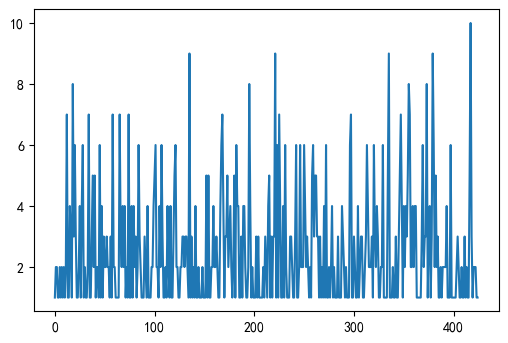

In [18]:
plt.plot(tradesCount)

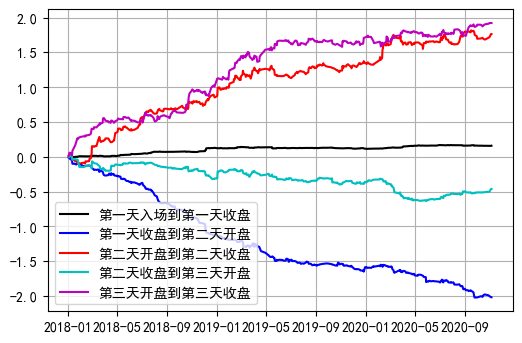

In [19]:
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl1), 'k')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl2), 'b')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl3), 'r')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl4), 'c')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl5), 'm')
plt.legend(['第一天入场到第一天收盘', '第一天收盘到第二天开盘','第二天开盘到第二天收盘','第二天收盘到第三天开盘','第三天开盘到第三天收盘'])
plt.grid()


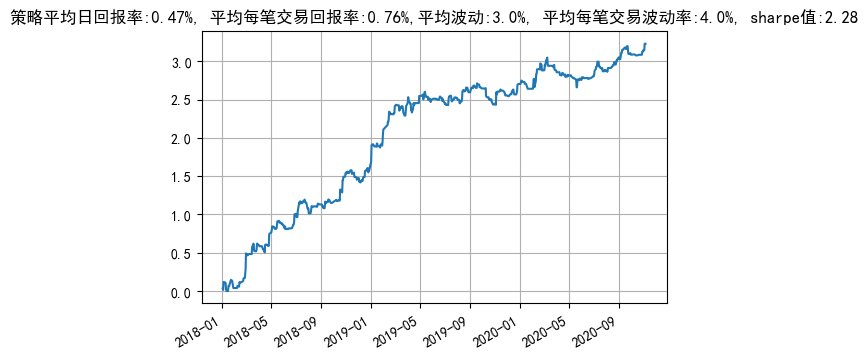

In [20]:
rschLib.drawPNL(dtesUsed, pnl3+pnl4+pnl5,  dtes, strategy_name, toDatabase='yes')